<a href="https://colab.research.google.com/github/Marcll0/Python/blob/main/PremierLeague23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [58]:
Premier = pd.read_csv("/content/PremierLeague.csv")
Premier['Winner'] = "Nan" ## criando uma coluna para definir quem foi o vencedor (time da casa/visitante ou empate)
Premier['Large winner'] = "Nan" ## criando uma coluna para definir se foi vitória ampla (3 ou mais gols de diferença)
Premier['Total Goals'] = "Nan" ## criando uma coluna para definir o total de gols na partida
Premier.head()

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals,Winner,Large winner,Total Goals
0,1,Premier League,Burnley vs Manchester City,8/11/2023,Burnley,Manchester City,0,3,Nan,Nan,Nan
1,1,Premier League,Arsenal vs Nottingham Forest,8/12/2023,Arsenal,Nottingham Forest,2,1,Nan,Nan,Nan
2,1,Premier League,AFC Bournemouth vs West Ham United,8/12/2023,AFC Bournemouth,West Ham United,1,1,Nan,Nan,Nan
3,1,Premier League,Brighton & Hove Albion vs Luton Town,8/12/2023,Brighton & Hove Albion,Luton Town,4,1,Nan,Nan,Nan
4,1,Premier League,Everton vs Fulham,8/12/2023,Everton,Fulham,0,1,Nan,Nan,Nan


In [59]:
for i in range(len(Premier)):
  if Premier["home_team_goals"][i] > Premier["away_team_goals"][i]:
    Premier["Winner"][i] = "Home"
  elif Premier["home_team_goals"][i] < Premier["away_team_goals"][i]:
    Premier["Winner"][i] = "Away"
  elif Premier["home_team_goals"][i] == Premier["away_team_goals"][i]:
    Premier["Winner"][i] = "Draw"
for i in range(len(Premier)):
  if (abs(Premier["home_team_goals"][i] - Premier["away_team_goals"][i]) >= 3):
    Premier["Large winner"][i] = "yes"
  else:
    Premier["Large winner"][i] = "no"
for i in range(len(Premier)):
  Premier['Total Goals'][i] = Premier["home_team_goals"][i] + Premier["away_team_goals"][i]


A saída de streaming foi truncada nas últimas 5000 linhas.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Premier['Total Goals'][i] = Premier["home_team_goals"][i] + Premier["away_team_goals"][i]
<ipython-input-59-319dfdf52ebc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Premier['Total Goals'][i] = Premier["home_team_goals"][i] + Premier["away_team_goals"][i]
<ipython-input-59-319dfdf52ebc>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series

In [61]:
Premier.head()

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals,Winner,Large winner,Total Goals
0,1,Premier League,Burnley vs Manchester City,8/11/2023,Burnley,Manchester City,0,3,Away,yes,3
1,1,Premier League,Arsenal vs Nottingham Forest,8/12/2023,Arsenal,Nottingham Forest,2,1,Home,no,3
2,1,Premier League,AFC Bournemouth vs West Ham United,8/12/2023,AFC Bournemouth,West Ham United,1,1,Draw,no,2
3,1,Premier League,Brighton & Hove Albion vs Luton Town,8/12/2023,Brighton & Hove Albion,Luton Town,4,1,Home,yes,5
4,1,Premier League,Everton vs Fulham,8/12/2023,Everton,Fulham,0,1,Away,no,1


In [62]:
print("média de gols dos times da casa :", Premier["home_team_goals"].mean())
print("média de gols dos times visitantes :",Premier["away_team_goals"].mean())
print("média de gols por partida :",Premier["Total Goals"].mean())
print("% de Jogos que acabaram em zero a zero :", len(Premier.loc[Premier["Total Goals"] == 0])/len(Premier))
print("% de Jogos com 3 gols ou mais:", len(Premier.loc[Premier["Total Goals"] >= 3])/len(Premier))
print("% de vitorias do time da casa:", len(Premier.loc[Premier["Winner"] == "Home"])/len(Premier))
print("% de vitorias do time visitante:", len(Premier.loc[Premier["Winner"] == "Away"])/len(Premier))
print("% de jogos com goleadas:", len(Premier.loc[Premier["Large winner"] == "yes"])/len(Premier))

média de gols dos times da casa : 1.8
média de gols dos times visitantes : 1.4789473684210526
média de gols por partida : 3.278947368421053
% de Jogos que acabaram em zero a zero : 0.02894736842105263
% de Jogos com 3 gols ou mais: 0.6473684210526316
% de vitorias do time da casa: 0.4605263157894737
% de vitorias do time visitante: 0.3236842105263158
% de jogos com goleadas: 0.2


In [63]:
Premier.loc[Premier["Total Goals"] == Premier["Total Goals"].max()] ## jogos com mais gols

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals,Winner,Large winner,Total Goals
58,6,Premier League,Sheffield United vs Newcastle United,9/24/2023,Sheffield United,Newcastle United,0,8,Away,yes,8
119,12,Premier League,Chelsea vs Manchester City,11/12/2023,Chelsea,Manchester City,4,4,Draw,no,8
221,23,Premier League,Newcastle United vs Luton Town,2/3/2024,Newcastle United,Luton Town,4,4,Draw,no,8


In [36]:
abs(Premier["home_team_goals"]- Premier["away_team_goals"]).max() ## maior diferença de gols ( Jogo mostrado acima )

8

In [64]:
Premier.loc[Premier["home_team_goals"] == Premier["home_team_goals"].max()] ## Jogos que o time da casa fez mais gols

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals,Winner,Large winner,Total Goals
59,7,Premier League,Aston Villa vs Brighton & Hove Albion,9/30/2023,Aston Villa,Brighton & Hove Albion,6,1,Home,yes,7
104,11,Premier League,Manchester City vs AFC Bournemouth,11/4/2023,Manchester City,AFC Bournemouth,6,1,Home,yes,7
322,33,Premier League,Chelsea vs Everton,4/15/2024,Chelsea,Everton,6,0,Home,yes,6


In [65]:
Premier.loc[Premier["away_team_goals"] >= Premier["away_team_goals"].max() - 2] ## Jogos que o time visitante fez mais gols

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals,Winner,Large winner,Total Goals
58,6,Premier League,Sheffield United vs Newcastle United,9/24/2023,Sheffield United,Newcastle United,0,8,Away,yes,8
235,24,Premier League,West Ham United vs Arsenal,2/11/2024,West Ham United,Arsenal,0,6,Away,yes,6
267,27,Premier League,Sheffield United vs Arsenal,3/4/2024,Sheffield United,Arsenal,0,6,Away,yes,6


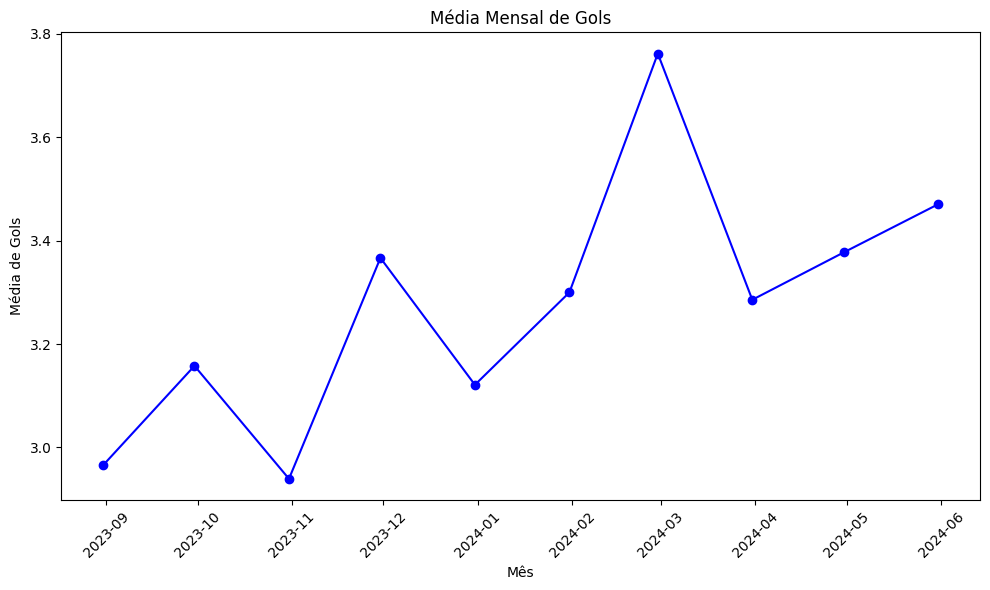

In [73]:
data = Premier[['starting_at','Total Goals']]
df = pd.DataFrame(data)

# Converte a coluna de data para o formato datetime, assumindo o formato mês/dia/ano
df['starting_at'] = pd.to_datetime(df['starting_at'], format="%m/%d/%Y")

# Agrupa por mês e calcula a média da coluna 'value' para cada mês
monthly_avg = df.resample('ME', on='starting_at').mean()

# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Total Goals'], marker='o', color='b', linestyle='-')
plt.title('Média Mensal de Gols')
plt.xlabel('Mês')
plt.ylabel('Média de Gols')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()